In [1]:
#imports

import os
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.callbacks import Callback


In [2]:
#Loading the dataset
mnist = keras.datasets.mnist
(x_full, y_full), (x_test_full, y_test_full) = mnist.load_data()

In [3]:
# Training Data
'''
TRAINING DATA
5400 - ones
5400 - other 
    [600 * 9 of 1/0 to 9]
'''

x_train_0 = x_full[y_full == 1][:5400]
y_train_0 = np.ones((5400,))
print("shape_training_0 =>")
print("\t",x_train_0.shape)
print("\t",y_train_0.shape)

x_train_others = []
y_train_others = []

x_digit = x_full[y_full == 0][:600]
y_digit = np.zeros((600,))  
x_train_others.append(x_digit)
y_train_others.append(y_digit)

for digit in range(2,10):
    x_digit = x_full[y_full == digit][:600]
    y_digit = np.zeros((600,))  
    x_train_others.append(x_digit)
    y_train_others.append(y_digit)
print("lenght_training_other =>")
print("\t",len(x_train_others),len(y_train_others))

x_train_others = np.concatenate(x_train_others, axis=0)
y_train_others = np.concatenate(y_train_others, axis=0)
print("shape_training_other =>")
print("\t",x_train_others.shape)
print("\t",y_train_others.shape)

x_train = np.concatenate([x_train_0, x_train_others], axis=0)
y_train = np.concatenate([y_train_0, y_train_others], axis=0)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
print("shape_training_complete =>")
print("\t",x_train.shape)
print("\t",y_train.shape)


shape_training_0 =>
	 (5400, 28, 28)
	 (5400,)
lenght_training_other =>
	 9 9
shape_training_other =>
	 (5400, 28, 28)
	 (5400,)
shape_training_complete =>
	 (10800, 28, 28)
	 (10800,)


In [4]:
# Testing Data
'''
TESTING DATA
810 - ones
810 - other 
    [90 * 9 of 1/0 to 9]
'''

x_test_0 = x_test_full[y_test_full == 1][:810]
y_test_0 = np.ones((810,))
print("shape_testing_0 =>")
print("\t",x_test_0.shape)
print("\t",y_test_0.shape)

x_test_others = []
y_test_others = []
x_digit = x_test_full[y_test_full == 0][:90]
y_digit = np.zeros((90,))  
x_test_others.append(x_digit)
y_test_others.append(y_digit)
for digit in range(2,10):
    x_digit = x_test_full[y_test_full == digit][:90]
    y_digit = np.zeros((90,))  
    x_test_others.append(x_digit)
    y_test_others.append(y_digit)
print("lenght_testing_other =>")
print("\t",len(x_test_others),len(y_test_others))

x_test_others = np.concatenate(x_test_others, axis=0)
y_test_others = np.concatenate(y_test_others, axis=0)
print("shape_testing_other =>")
print("\t",x_test_others.shape)
print("\t",y_test_others.shape)


x_test = np.concatenate([x_test_0, x_test_others], axis=0)
y_test = np.concatenate([y_test_0, y_test_others], axis=0)
x_test, y_test = shuffle(x_test, y_test, random_state=42)
print("shape_testing_complete =>")
print("\t",x_test.shape)
print("\t",y_test.shape)


shape_testing_0 =>
	 (810, 28, 28)
	 (810,)
lenght_testing_other =>
	 9 9
shape_testing_other =>
	 (810, 28, 28)
	 (810,)
shape_testing_complete =>
	 (1620, 28, 28)
	 (1620,)


In [5]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 169)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,306 (75.41 KB)

 Trainable params: 19,306 (75.41 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
x=model.get_weights()[16]
print((x))

[[-1.0152555]
 [-0.0326736]]


In [7]:
def load_model_weights(model, weight_dir="./generateModelWeights/InitWeights"):
    
    for layer_num, layer in enumerate(model.layers):
        file_path = os.path.join(weight_dir, f"layer_number_{layer_num}.npz")
        if os.path.exists(file_path):
            loaded = np.load(file_path)
            weights = [loaded[key] for key in loaded]
            if layer.weights: 
                layer.set_weights(weights)
                print(f"Loaded weights for layer {layer_num} from {file_path}")
            else:
                print(f"Layer {layer_num} has no weights.")
        else:
            print(f"No weights found for layer {layer_num}.")

load_model_weights(model)

Loaded weights for layer 0 from ./generateModelWeights/InitWeights\layer_number_0.npz
No weights found for layer 1.
No weights found for layer 2.
Loaded weights for layer 3 from ./generateModelWeights/InitWeights\layer_number_3.npz
Loaded weights for layer 4 from ./generateModelWeights/InitWeights\layer_number_4.npz
Loaded weights for layer 5 from ./generateModelWeights/InitWeights\layer_number_5.npz
Loaded weights for layer 6 from ./generateModelWeights/InitWeights\layer_number_6.npz
Loaded weights for layer 7 from ./generateModelWeights/InitWeights\layer_number_7.npz
Loaded weights for layer 8 from ./generateModelWeights/InitWeights\layer_number_8.npz
Loaded weights for layer 9 from ./generateModelWeights/InitWeights\layer_number_9.npz
Loaded weights for layer 10 from ./generateModelWeights/InitWeights\layer_number_10.npz


In [8]:
'''
Should match
[[0.5173087]
 [0.5407704]]
'''
x=model.get_weights()[16]
print((x))

[[0.5173087]
 [0.5407704]]


In [9]:
class SaveWeightsCallback(callbacks.Callback):
    def __init__(self, save_dir):
        super(SaveWeightsCallback, self).__init__()
        self.save_dir = save_dir

    def on_epoch_end(self, epoch, logs=None):
        epoch_dir = os.path.join(self.save_dir, f"AfterEpoch{epoch + 1}")
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)
        
        for layer_num, layer in enumerate(self.model.layers):
            if layer.weights:  # Only save weights for layers that have weights
                file_path = os.path.join(epoch_dir, f"Layer_{layer_num}.npz")
                weights = layer.get_weights()
                np.savez(file_path, *weights)
                print(f"Saved weights for layer {layer_num} to {file_path}")


In [10]:
save_dir = "./OneModelWeightsTraining"
save_weights_callback = SaveWeightsCallback(save_dir)

In [11]:
history = model.fit(
    x_train, y_train,
    epochs=10,  
    callbacks=[save_weights_callback]
)

Epoch 1/10
335/338 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8540 - loss: 0.4540Saved weights for layer 0 to ./OneModelWeightsTraining\AfterEpoch1\Layer_0.npz
Saved weights for layer 3 to ./OneModelWeightsTraining\AfterEpoch1\Layer_3.npz
Saved weights for layer 4 to ./OneModelWeightsTraining\AfterEpoch1\Layer_4.npz
Saved weights for layer 5 to ./OneModelWeightsTraining\AfterEpoch1\Layer_5.npz
Saved weights for layer 6 to ./OneModelWeightsTraining\AfterEpoch1\Layer_6.npz
Saved weights for layer 7 to ./OneModelWeightsTraining\AfterEpoch1\Layer_7.npz
Saved weights for layer 8 to ./OneModelWeightsTraining\AfterEpoch1\Layer_8.npz
Saved weights for layer 9 to ./OneModelWeightsTraining\AfterEpoch1\Layer_9.npz
Saved weights for layer 10 to ./OneModelWeightsTraining\AfterEpoch1\Layer_10.npz
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8550 - loss: 0.4531
Epoch 2/10
330/338 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9747 - loss: 0.2940Saved weights for layer 0 to ./OneModelWei

In [12]:
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")


Epoch 1: Accuracy = 0.9366
Epoch 2: Accuracy = 0.9773
Epoch 3: Accuracy = 0.9832
Epoch 4: Accuracy = 0.9844
Epoch 5: Accuracy = 0.9872
Epoch 6: Accuracy = 0.9889
Epoch 7: Accuracy = 0.9912
Epoch 8: Accuracy = 0.9925
Epoch 9: Accuracy = 0.9930
Epoch 10: Accuracy = 0.9930


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9872 - loss: 0.0720 
Test accuracy: 0.989506185054779


In [14]:
from tensorflow.keras.models import save_model

model.save('One_model.h5') 


In [15]:
model.save('One_model_2.keras') 

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot kernel
def plot_kernel(kernel, title):
    plt.figure(figsize=(6, 6))
    # Extract the 2D slice of the kernel weights
    kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
    sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

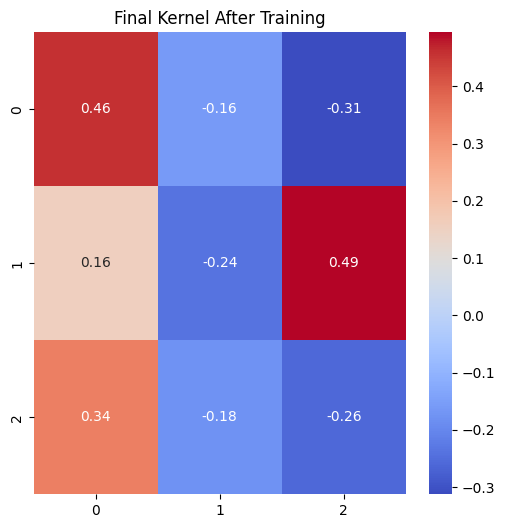

In [17]:
# After training, extract and plot the kernel weights
final_kernel = model.layers[0].get_weights()[0]
plot_kernel(final_kernel, 'Final Kernel After Training')